In [20]:
import numpy as np
import dill
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import seaborn

In [4]:
def openPickle(folder):
    with open(folder+'/Result_epps_expEPPS_p0_r0.pkl', 'rb') as f:
        file1 = dill.load(f)
    with open(folder+'/Result_epps_expEPPS_p0_r1.pkl', 'rb') as f:
        file2 = dill.load(f)
    with open(folder+'/Result_epps_expEPPS_p0_r2.pkl', 'rb') as f:
        file3 = dill.load(f)
    with open(folder+'/Result_epps_expEPPS_p0_r3.pkl', 'rb') as f:
        file4 = dill.load(f)
    with open(folder+'/Result_epps_expEPPS_p0_r4.pkl', 'rb') as f:
        file5 = dill.load(f)
    all_file = [file1, file2, file3, file4, file5]
    return all_file

def plot_all(dataset, init, final, title, plot=False):
    if plot == True:
        x = np.linspace(init, final, len(dataset[0]['Fidelity History'][init:]))
        plt.plot(x, dataset[0]['Fidelity History'][init:final+1], '-r')
        plt.plot(x, dataset[1]['Fidelity History'][init:final+1], '-g')
        plt.plot(x, dataset[2]['Fidelity History'][init:final+1], '-b')
        plt.plot(x, dataset[3]['Fidelity History'][init:final+1], '-c')
        plt.plot(x, dataset[4]['Fidelity History'][init:final+1], '-m')
        plt.xlabel('Direct fidelity estimation')
        plt.ylabel('Fidelity')
        plt.title(title)
        plt.show()

    avg_ssdp = []
    avg_ssdp.append(dataset[0]['Fidelity History'][init:final+1])
    avg_ssdp.append(dataset[1]['Fidelity History'][init:final+1])
    avg_ssdp.append(dataset[2]['Fidelity History'][init:final+1])
    avg_ssdp.append(dataset[3]['Fidelity History'][init:final+1])
    avg_ssdp.append(dataset[4]['Fidelity History'][init:final+1])
    avg_ssdp = np.array(avg_ssdp)

    mean_ssdp = avg_ssdp.mean(axis=0)
    std_ssdp = avg_ssdp.std(axis=0)
    print(title, "9000 DFE", round(mean_ssdp[-1], 3), "+-", std_ssdp[-1])

    if plot == True:
        plt.xlabel('Direct fidelity estimation')
        plt.ylabel('Fidelity')
        plt.title(title)

        plt.plot(np.linspace(init, final+1, final+1-init), mean_ssdp, '-', color='cornflowerblue')
        plt.fill_between(np.linspace(init, final+1, final+1-init), mean_ssdp-std_ssdp, mean_ssdp+std_ssdp, alpha=0.3, color='cornflowerblue')
        plt.show()

    return round(mean_ssdp[-1], 3)

def distance(lat1, lat2, lon1, lon2):
     
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    r = 6371

    return(c * r)

In [6]:
f_BKK_CM_1_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.001_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.001 tau=1')
f_BKK_CM_3_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.003_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.003 tau=1')
f_BKK_CM_6_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.006_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.006 tau=1') ###
f_BKK_CM_9_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.009_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.009 tau=1')
f_BKK_CM_12_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_CM_0.012_tau1_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.012 tau=1')

print('-------------------------------------------------------------------------------------------')

f_BKK_SK_1_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.001_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.001 tau=1')
f_BKK_SK_3_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.003_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.003 tau=1')
f_BKK_SK_6_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.006_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.006 tau=1')
f_BKK_SK_9_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.009_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.009 tau=1')
f_BKK_SK_12_tau1 = plot_all(openPickle('meaErr_0.03/tau1/BKK_SK_0.012_tau1_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.012 tau=1')

print('-------------------------------------------------------------------------------------------')

f_SK_CM_1_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.001_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.001 tau=1')
f_SK_CM_3_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.003_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.003 tau=1')
f_SK_CM_6_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.006_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.006 tau=1')
f_SK_CM_9_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.009_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=1')
f_SK_CM_12_tau1 = plot_all(openPickle('meaErr_0.03/tau1/SK_CM_0.012_tau1_meaErr3'), 1000, 9000, 'SK_CM, loss=0.012 tau=1')

BKK_CM, loss=0.001 tau=1 9000 DFE 0.869 +- 0.0044468783413339034
BKK_CM, loss=0.003 tau=1 9000 DFE 0.863 +- 0.0027129223241640914
BKK_CM, loss=0.006 tau=1 9000 DFE 0.85 +- 0.0023190596793049864
BKK_CM, loss=0.009 tau=1 9000 DFE 0.817 +- 0.004739880879101555
BKK_CM, loss=0.012 tau=1 9000 DFE 0.762 +- 0.008976128727412188
-------------------------------------------------------------------------------------------
BKK_SK, loss=0.001 tau=1 9000 DFE 0.869 +- 0.0033868265579891582
BKK_SK, loss=0.003 tau=1 9000 DFE 0.862 +- 0.004677757612139312
BKK_SK, loss=0.006 tau=1 9000 DFE 0.843 +- 0.004587925815262771
BKK_SK, loss=0.009 tau=1 9000 DFE 0.805 +- 0.004510183846920134
BKK_SK, loss=0.012 tau=1 9000 DFE 0.744 +- 0.003630895490513283
-------------------------------------------------------------------------------------------
SK_CM, loss=0.001 tau=1 9000 DFE 0.861 +- 0.004807831985372785
SK_CM, loss=0.003 tau=1 9000 DFE 0.848 +- 0.0023124892938508074
SK_CM, loss=0.006 tau=1 9000 DFE 0.801 +- 0.00

In [7]:
PG = False
f_BKK_CM_1_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.001_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.001 tau=.25', plot=PG)
f_BKK_CM_3_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.003_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.003 tau=.25', plot=PG)
f_BKK_CM_6_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.006_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.006 tau=.25', plot=PG)
f_BKK_CM_9_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.009_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.009 tau=.25', plot=PG)
f_BKK_CM_12_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_CM_0.012_tau0.25_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.012 tau=.25', plot=PG)

print('-------------------------------------------------------------------------------------------')

f_BKK_SK_1_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.001_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.001 tau=.25', plot=PG)
f_BKK_SK_3_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.003_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.003 tau=.25', plot=PG)
f_BKK_SK_6_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.006_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.006 tau=.25', plot=PG)
f_BKK_SK_9_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.009_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.009 tau=.25', plot=PG)
f_BKK_SK_12_tau25 = plot_all(openPickle('meaErr_0.03/tau25/BKK_SK_0.012_tau0.25_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.012 tau=.25', plot=PG)

print('-------------------------------------------------------------------------------------------')

f_SK_CM_1_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.001_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.001 tau=.25', plot=PG)
f_SK_CM_3_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.003_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.003 tau=.25', plot=PG)
f_SK_CM_6_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.006_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.006 tau=.25', plot=PG)
f_SK_CM_9_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.009_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=.25', plot=PG)
f_SK_CM_12_tau25 = plot_all(openPickle('meaErr_0.03/tau25/SK_CM_0.012_tau0.25_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=.25', plot=PG)

BKK_CM, loss=0.001 tau=.25 9000 DFE 0.843 +- 0.005524767812949082
BKK_CM, loss=0.003 tau=.25 9000 DFE 0.845 +- 0.00390620657506023
BKK_CM, loss=0.006 tau=.25 9000 DFE 0.837 +- 0.005273592045992437
BKK_CM, loss=0.009 tau=.25 9000 DFE 0.802 +- 0.006699545100561
BKK_CM, loss=0.012 tau=.25 9000 DFE 0.751 +- 0.005486853354554375
-------------------------------------------------------------------------------------------
BKK_SK, loss=0.001 tau=.25 9000 DFE 0.841 +- 0.0014249276954999843
BKK_SK, loss=0.003 tau=.25 9000 DFE 0.847 +- 0.0056432330683498
BKK_SK, loss=0.006 tau=.25 9000 DFE 0.83 +- 0.007348713353187433
BKK_SK, loss=0.009 tau=.25 9000 DFE 0.787 +- 0.005466377117842298
BKK_SK, loss=0.012 tau=.25 9000 DFE 0.721 +- 0.005324783720791189
-------------------------------------------------------------------------------------------
SK_CM, loss=0.001 tau=.25 9000 DFE 0.829 +- 0.004639382489711615
SK_CM, loss=0.003 tau=.25 9000 DFE 0.82 +- 0.004506828198295653
SK_CM, loss=0.006 tau=.25 9000 DF

In [8]:
# tau0.5

f_BKK_CM_1_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.001_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.001 tau=.5')
f_BKK_CM_3_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.003_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.003 tau=.5')
f_BKK_CM_6_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.006_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.006 tau=.5')
f_BKK_CM_9_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.009_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.009 tau=.5')
f_BKK_CM_12_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_CM_0.012_tau0.5_meaErr3'), 1000, 9000, 'BKK_CM, loss=0.012 tau=.5')

print('-------------------------------------------------------------------------------------------')

f_BKK_SK_1_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.001_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.001 tau=.5')
f_BKK_SK_3_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.003_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.003 tau=.5')
f_BKK_SK_6_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.006_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.006 tau=.5')
f_BKK_SK_9_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.009_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.009 tau=.5')
f_BKK_SK_12_tau05 = plot_all(openPickle('meaErr_0.03/tau05/BKK_SK_0.012_tau0.5_meaErr3'), 1000, 9000, 'BKK_SK, loss=0.012 tau=.5')

print('-------------------------------------------------------------------------------------------')

f_SK_CM_1_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.001_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.001 tau=.5')
f_SK_CM_3_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.003_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.003 tau=.5')
f_SK_CM_6_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.006_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.006 tau=.5')
f_SK_CM_9_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.009_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=.5')
f_SK_CM_12_tau05 = plot_all(openPickle('meaErr_0.03/tau05/SK_CM_0.012_tau0.5_meaErr3'), 1000, 9000, 'SK_CM, loss=0.009 tau=.5')

BKK_CM, loss=0.001 tau=.5 9000 DFE 0.863 +- 0.004152541145894848
BKK_CM, loss=0.003 tau=.5 9000 DFE 0.862 +- 0.004606312260369993
BKK_CM, loss=0.006 tau=.5 9000 DFE 0.842 +- 0.003946632733072811
BKK_CM, loss=0.009 tau=.5 9000 DFE 0.813 +- 0.004800126985399087
BKK_CM, loss=0.012 tau=.5 9000 DFE 0.755 +- 0.003369886975028566
-------------------------------------------------------------------------------------------
BKK_SK, loss=0.001 tau=.5 9000 DFE 0.856 +- 0.005477970532877434
BKK_SK, loss=0.003 tau=.5 9000 DFE 0.856 +- 0.004642134152137122
BKK_SK, loss=0.006 tau=.5 9000 DFE 0.836 +- 0.005077549561021396
BKK_SK, loss=0.009 tau=.5 9000 DFE 0.8 +- 0.008739851576884256
BKK_SK, loss=0.012 tau=.5 9000 DFE 0.731 +- 0.0064797679360839655
-------------------------------------------------------------------------------------------
SK_CM, loss=0.001 tau=.5 9000 DFE 0.849 +- 0.004639031165152478
SK_CM, loss=0.003 tau=.5 9000 DFE 0.837 +- 0.004091606405903198
SK_CM, loss=0.006 tau=.5 9000 DFE 0.797

In [9]:
print('Measurement error = 1%') # Measurement error = 1%

print('tau=1 ')# tau=1
f_BKK_CM_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.001_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.001 tau=1', plot=False)
f_BKK_CM_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.003_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.003 tau=1', plot=False)
f_BKK_CM_6_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.006_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.006 tau=1', plot=False)
f_BKK_CM_9_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.009_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.009 tau=1', plot=False)

f_BKK_SK_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.001_tau1_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.001 tau=1', plot=False)
f_BKK_SK_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.003_tau1_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.003 tau=1', plot=False)
f_BKK_SK_6_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.006_tau1_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.006 tau=1', plot=False)
f_BKK_SK_9_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.009_tau1_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.009 tau=1', plot=False)

f_SK_CM_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.001_tau1_meaErr1'), 1000, 9000, 'SK_CM, loss=0.01 tau=1', plot=False)
f_SK_CM_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.003_tau1_meaErr1'), 1000, 9000, 'SK_CM, loss=0.03 tau=1', plot=False)
f_SK_CM_6_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.006_tau1_meaErr1'), 1000, 9000, 'SK_CM, loss=0.06 tau=1', plot=False)
f_SK_CM_9_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.009_tau1_meaErr1'), 1000, 9000, 'SK_CM, loss=0.09 tau=1', plot=False)


print('tau=0.25') # tau=0.25
f_BKK_CM_1_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_CM_0.001_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.001 tau=0.25', plot=False)
f_BKK_CM_3_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_CM_0.003_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.003 tau=0.25', plot=False)
f_BKK_CM_6_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_CM_0.006_tau0.25_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.006 tau=0.25', plot=False)

f_BKK_SK_1_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_SK_0.001_tau0.25_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.001 tau=0.25', plot=False)
f_BKK_SK_3_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_SK_0.003_tau0.25_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.003 tau=0.25', plot=False)
f_BKK_SK_6_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/BKK_SK_0.006_tau0.25_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.006 tau=0.25', plot=False)

f_SK_CM_1_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/SK_CM_0.001_tau0.25_meaErr1'), 1000, 9000, 'SK_CM, loss=0.001 tau=0.25', plot=False)
f_SK_CM_3_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/SK_CM_0.003_tau0.25_meaErr1'), 1000, 9000, 'SK_CM, loss=0.003 tau=0.25', plot=False)
f_SK_CM_6_mea1_tau25 = plot_all(openPickle('meaErr_0.01/tau25/SK_CM_0.006_tau0.25_meaErr1'), 1000, 9000, 'SK_CM, loss=0.006 tau=0.25', plot=False)

print('--------------------------------------------------------------------')

print('Measurement error = 5%') # meaErr = 5%

print('tau=1') # tau=1
f_BKK_CM_1_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/BKK_CM_0.001_tau1_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.001 tau=1 meaErr=5', plot=False)
f_BKK_CM_3_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/BKK_CM_0.003_tau1_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.003 tau=1 meaErr=5', plot=False)
f_BKK_CM_6_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/BKK_CM_0.006_tau1_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.006 tau=1 meaErr=5', plot=False)
f_BKK_CM_9_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/BKK_CM_0.009_tau1_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.009 tau=1 meaErr=5', plot=False)

f_BKK_SK_1_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/BKK_SK_0.001_tau1_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.001 tau=1 meaErr=5', plot=False)
f_BKK_SK_3_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/BKK_SK_0.003_tau1_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.003 tau=1 meaErr=5', plot=False)
f_BKK_SK_6_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/BKK_SK_0.006_tau1_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.006 tau=1 meaErr=5', plot=False)
f_BKK_SK_9_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/BKK_SK_0.009_tau1_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.009 tau=1 meaErr=5', plot=False)

f_SK_CM_1_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/SK_CM_0.001_tau1_meaErr5'), 1000, 9000, 'SK_CM, loss=0.001 tau=1 meaErr=5', plot=False)
f_SK_CM_3_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/SK_CM_0.003_tau1_meaErr5'), 1000, 9000, 'SK_CM, loss=0.003 tau=1 meaErr=5', plot=False)
f_SK_CM_6_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/SK_CM_0.006_tau1_meaErr5'), 1000, 9000, 'SK_CM, loss=0.006 tau=1 meaErr=5', plot=False)
f_SK_CM_9_mea5_tau_1 = plot_all(openPickle('meaErr_0.05/tau1/SK_CM_0.009_tau1_meaErr5'), 1000, 9000, 'SK_CM, loss=0.009 tau=1 meaErr=5', plot=False)

print('tau=0.5') # tau=0.5
f_BKK_CM_1_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/BKK_CM_0.001_tau0.5_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.001 tau=0.5 meaErr=5', plot=False)
f_BKK_CM_3_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/BKK_CM_0.003_tau0.5_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.003 tau=0.5 meaErr=5', plot=False)
f_BKK_CM_6_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/BKK_CM_0.006_tau0.5_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.006 tau=0.5 meaErr=5', plot=False)
f_BKK_CM_9_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/BKK_CM_0.009_tau0.5_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.009 tau=0.5 meaErr=5', plot=False)

f_BKK_SK_1_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/BKK_SK_0.001_tau0.5_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.001 tau=0.5 meaErr=5', plot=False)
f_BKK_SK_3_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/BKK_SK_0.003_tau0.5_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.003 tau=0.5 meaErr=5', plot=False)
f_BKK_SK_6_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/BKK_SK_0.006_tau0.5_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.006 tau=0.5 meaErr=5', plot=False)
f_BKK_SK_9_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/BKK_SK_0.009_tau0.5_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.009 tau=0.5 meaErr=5', plot=False)

f_SK_CM_1_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/SK_CM_0.001_tau0.5_meaErr5'), 1000, 9000, 'SK_CM, loss=0.001 tau=0.5 meaErr=5', plot=False)
f_SK_CM_3_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/SK_CM_0.003_tau0.5_meaErr5'), 1000, 9000, 'SK_CM, loss=0.003 tau=0.5 meaErr=5', plot=False)
f_SK_CM_6_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/SK_CM_0.006_tau0.5_meaErr5'), 1000, 9000, 'SK_CM, loss=0.006 tau=0.5 meaErr=5', plot=False)
f_SK_CM_9_mea5_tau_05 = plot_all(openPickle('meaErr_0.05/tau05/SK_CM_0.009_tau0.5_meaErr5'), 1000, 9000, 'SK_CM, loss=0.009 tau=0.5 meaErr=5', plot=False)

print('tau=0.25') # tau=0.25
f_BKK_CM_1_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/BKK_CM_0.001_tau0.25_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.001 tau=0.25 meaErr=5', plot=False)
f_BKK_CM_3_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/BKK_CM_0.003_tau0.25_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.003 tau=0.25 meaErr=5', plot=False)
f_BKK_CM_6_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/BKK_CM_0.006_tau0.25_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.006 tau=0.25 meaErr=5', plot=False)
f_BKK_CM_9_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/BKK_CM_0.009_tau0.25_meaErr5'), 1000, 9000, 'BKK_CM, loss=0.009 tau=0.25 meaErr=5', plot=False)

f_BKK_SK_1_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/BKK_SK_0.001_tau0.25_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.001 tau=0.25 meaErr=5', plot=False)
f_BKK_SK_3_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/BKK_SK_0.003_tau0.25_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.003 tau=0.25 meaErr=5', plot=False)
f_BKK_SK_6_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/BKK_SK_0.006_tau0.25_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.006 tau=0.25 meaErr=5', plot=False)
f_BKK_SK_9_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/BKK_SK_0.009_tau0.25_meaErr5'), 1000, 9000, 'BKK_SK, loss=0.009 tau=0.25 meaErr=5', plot=False)

f_SK_CM_1_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/SK_CM_0.001_tau0.25_meaErr5'), 1000, 9000, 'SK_CM, loss=0.001 tau=0.25 meaErr=5', plot=False)
f_SK_CM_3_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/SK_CM_0.003_tau0.25_meaErr5'), 1000, 9000, 'SK_CM, loss=0.003 tau=0.25 meaErr=5', plot=False)
f_SK_CM_6_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/SK_CM_0.006_tau0.25_meaErr5'), 1000, 9000, 'SK_CM, loss=0.006 tau=0.25 meaErr=5', plot=False)
f_SK_CM_9_mea5_tau_25 = plot_all(openPickle('meaErr_0.05/tau25/SK_CM_0.009_tau0.25_meaErr5'), 1000, 9000, 'SK_CM, loss=0.009 tau=0.25 meaErr=5', plot=False)

Measurement error = 1%
tau=1 
BKK_CM, loss=0.001 tau=1 9000 DFE 0.927 +- 0.0027255578958041795
BKK_CM, loss=0.003 tau=1 9000 DFE 0.92 +- 0.0031812514453120997
BKK_CM, loss=0.006 tau=1 9000 DFE 0.904 +- 0.003517132732752693
BKK_CM, loss=0.009 tau=1 9000 DFE 0.871 +- 0.004734981115940129
BKK_SK, loss=0.001 tau=1 9000 DFE 0.925 +- 0.0016294984564689697
BKK_SK, loss=0.003 tau=1 9000 DFE 0.916 +- 0.0015983498146135936
BKK_SK, loss=0.006 tau=1 9000 DFE 0.897 +- 0.004238917219522056
BKK_SK, loss=0.009 tau=1 9000 DFE 0.86 +- 0.002512460333788484
SK_CM, loss=0.01 tau=1 9000 DFE 0.921 +- 0.002160306086749182
SK_CM, loss=0.03 tau=1 9000 DFE 0.906 +- 0.0012761431063862537
SK_CM, loss=0.06 tau=1 9000 DFE 0.856 +- 0.006527460281396093
SK_CM, loss=0.09 tau=1 9000 DFE 0.737 +- 0.003932486121227924
tau=0.25
BKK_CM, loss=0.001 tau=0.25 9000 DFE 0.9 +- 0.00321446158905255
BKK_CM, loss=0.003 tau=0.25 9000 DFE 0.904 +- 0.0030661162681314405
BKK_CM, loss=0.006 tau=0.25 9000 DFE 0.887 +- 0.005105136481005478

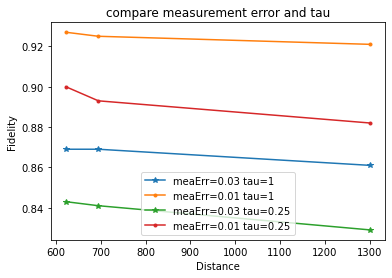

In [8]:
# fixed loss = 0.001
distant = [distance(13.4553, 18.894982, 100.31316, 98.954428), # BKK-CM 
            distance(13.4553, 7.213724, 100.31316, 100.594990), # BKK-SK
            distance(7.213724, 18.804982, 100.594990, 98.954428) ] # SK-CM
# tau = 1
plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '*-', label='meaErr=0.03 tau=1')
plt.plot(distant, [f_BKK_CM_1_mea1_tau1, f_BKK_SK_1_mea1_tau1, f_SK_CM_1_mea1_tau1], '.-', label='meaErr=0.01 tau=1')

# tau = 0.25
plt.plot(distant, [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25], '*-', label='meaErr=0.03 tau=0.25')
plt.plot(distant, [f_BKK_CM_1_mea1_tau25, f_BKK_SK_1_mea1_tau25, f_SK_CM_1_mea1_tau25], '.-', label='meaErr=0.01 tau=0.25')

plt.title('compare measurement error and tau')
plt.xlabel('Distance')
plt.ylabel('Fidelity')
plt.legend()
plt.show()

# Tau effect more than measurement error
# look at orange red blue

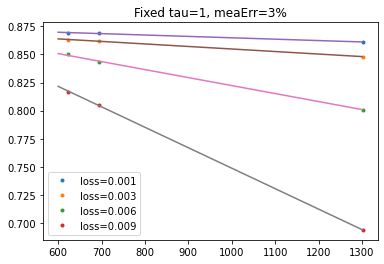

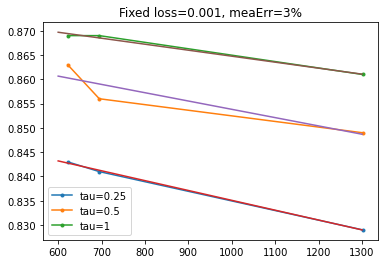

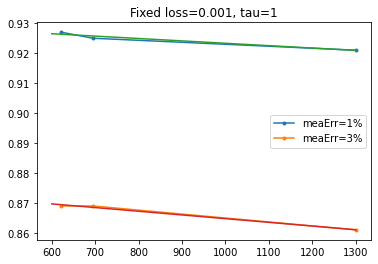

In [9]:
# loss change (fixed tau=1, meaErr=3%)

plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.', label='loss=0.001') # loss = 0.001
plt.plot(distant, [f_BKK_CM_3_tau1, f_BKK_SK_3_tau1, f_SK_CM_3_tau1], '.', label='loss=0.003') # loss = 0.003
plt.plot(distant, [f_BKK_CM_6_tau1, f_BKK_SK_6_tau1, f_SK_CM_6_tau1], '.', label='loss=0.006') # loss = 0.006
plt.plot(distant, [f_BKK_CM_9_tau1, f_BKK_SK_9_tau1, f_SK_CM_9_tau1], '.', label='loss=0.009') # loss = 0.009

x = np.linspace(600, 1300, 2)
model1_1 = np.polyfit(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], 1)
model1_2 = np.polyfit(distant, [f_BKK_CM_3_tau1, f_BKK_SK_3_tau1, f_SK_CM_3_tau1], 1)
model1_3 = np.polyfit(distant, [f_BKK_CM_6_tau1, f_BKK_SK_6_tau1, f_SK_CM_6_tau1], 1)
model1_4 = np.polyfit(distant, [f_BKK_CM_9_tau1, f_BKK_SK_9_tau1, f_SK_CM_9_tau1], 1)
y1_1 = model1_1[0]*x + model1_1[1]
y1_2 = model1_2[0]*x + model1_2[1]
y1_3 = model1_3[0]*x + model1_3[1]
y1_4 = model1_4[0]*x + model1_4[1]
plt.plot(x, y1_1)
plt.plot(x, y1_2)
plt.plot(x, y1_3)
plt.plot(x, y1_4)
plt.plot()

plt.title('Fixed tau=1, meaErr=3%')
plt.legend()
plt.show()

# ----------------------------------------------------------------------------------------------------------------#

# tau change (fixed loss=0.001, meaErr=3%)
plt.plot(distant, [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25], '.-', label='tau=0.25') # tau = 0.25
plt.plot(distant, [f_BKK_CM_1_tau05, f_BKK_SK_1_tau05, f_SK_CM_1_tau05], '.-', label='tau=0.5') # tau = 0.5
plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.-', label='tau=1') # tau =1

model2_1 = np.polyfit(distant, [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25], 1)
model2_2 = np.polyfit(distant, [f_BKK_CM_1_tau05, f_BKK_SK_1_tau05, f_SK_CM_1_tau05], 1)
model2_3 = np.polyfit(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], 1)
y2_1 = model2_1[0]*x + model2_1[1]
y2_2 = model2_2[0]*x + model2_2[1]
y2_3 = model2_3[0]*x + model2_3[1]
plt.plot(x, y2_1)
plt.plot(x, y2_2)
plt.plot(x, y2_3)
plt.plot()

plt.title('Fixed loss=0.001, meaErr=3%')
plt.legend()
plt.show()

# ----------------------------------------------------------------------------------------------------------------#

# meaErr change (fixed loss=0.001, tau=1)
plt.plot(distant, [f_BKK_CM_1_mea1_tau1, f_BKK_SK_1_mea1_tau1, f_SK_CM_1_mea1_tau1], '.-', label='meaErr=1%') # meaErr = 1%
plt.plot(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.-', label='meaErr=3%') # meaErr = 3%

model3_1 = np.polyfit(distant, [f_BKK_CM_1_mea1_tau1, f_BKK_SK_1_mea1_tau1, f_SK_CM_1_mea1_tau1], 1)
model3_2 = np.polyfit(distant, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], 1)
y3_1 = model3_1[0]*x + model3_1[1]
y3_2 = model3_2[0]*x + model3_2[1]
plt.plot(x, y3_1)
plt.plot(x, y3_2)

plt.title('Fixed loss=0.001, tau=1')
plt.legend()
plt.show()

In [10]:
print('loss change (fixed tau=1, meaErr=3%)')
print(model1_1)
print(model1_2)
print(model1_3)
print(model1_4)

print('tau change (fixed loss=0.001, meaErr=3%)')
print(model2_1)
print(model2_2)
print(model2_2)

print('meaErr change (fixed loss=0.001, tau=1)')
print(model3_1)
print(model3_2)

# f_0 is best fidelity tau=1 loss=0.001 meaErr=1 BKK_CM
print('f_0 = ', f_BKK_CM_1_mea1_tau1)

loss change (fixed tau=1, meaErr=3%)
[-1.23296100e-05  8.77092003e-01]
[-2.24781834e-05  8.77280861e-01]
[-7.1040014e-05  8.9332200e-01]
[-1.81889730e-04  9.30714802e-01]
tau change (fixed loss=0.001, meaErr=3%)
[-2.02971468e-05  8.55377714e-01]
[-1.70979704e-05  8.70919484e-01]
[-1.70979704e-05  8.70919484e-01]
meaErr change (fixed loss=0.001, tau=1)
[-7.96753689e-06  9.31285711e-01]
[-1.23296100e-05  8.77092003e-01]
f_0 =  0.927


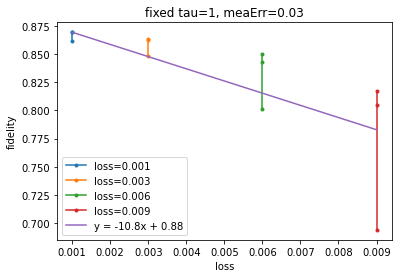

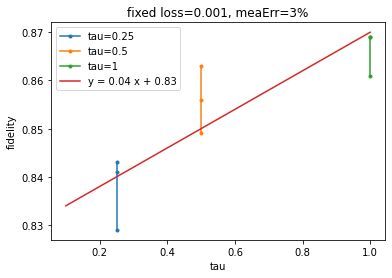

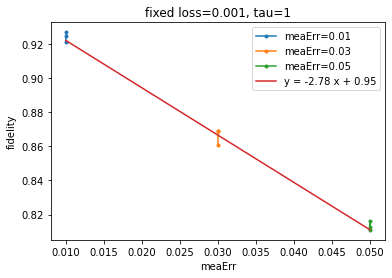

In [11]:
# loss-fidelity (fixed tau=1, meaErr=3%)
plt.plot([0.001]*3, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.-', label='loss=0.001') # loss = 0.001
plt.plot([0.003]*3, [f_BKK_CM_3_tau1, f_BKK_SK_3_tau1, f_SK_CM_3_tau1], '.-', label='loss=0.003') # loss = 0.003
plt.plot([0.006]*3, [f_BKK_CM_6_tau1, f_BKK_SK_6_tau1, f_SK_CM_6_tau1], '.-', label='loss=0.006') # loss = 0.006
plt.plot([0.009]*3, [f_BKK_CM_9_tau1, f_BKK_SK_9_tau1, f_SK_CM_9_tau1], '.-', label='loss=0.009') # loss = 0.009

loss_fit = [0.001, 0.001, 0.001, 0.003, 0.003, 0.003, 0.006, 0.006, 0.006, 0.009, 0.009, 0.009]
model_loss = np.polyfit(loss_fit, [
    f_BKK_CM_3_tau1, f_BKK_SK_3_tau1, f_SK_CM_3_tau1, f_BKK_CM_3_tau1, f_BKK_SK_3_tau1, f_SK_CM_3_tau1,
    f_BKK_CM_6_tau1, f_BKK_SK_6_tau1, f_SK_CM_6_tau1, f_BKK_CM_9_tau1, f_BKK_SK_9_tau1, f_SK_CM_9_tau1], 1)
model_loss[0] = round(model_loss[0], 2)
model_loss[1] = round(model_loss[1], 2)
x = np.linspace(0.001, 0.009, 2)
y_loss = model_loss[0]*x + model_loss[1]
plt.plot(x, y_loss, label=f'y = {model_loss[0]}x + {model_loss[1]}')

plt.xlabel('loss')
plt.ylabel('fidelity')
plt.title('fixed tau=1, meaErr=0.03')
plt.legend()
plt.show()

# -----------------------------------------------------------------------------

# tau-fidelity (fixed loss=0.001, meaErr=3%)
plt.plot([0.25]*3, [f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25], '.-', label='tau=0.25') # tau = 0.25
plt.plot([0.5]*3, [f_BKK_CM_1_tau05, f_BKK_SK_1_tau05, f_SK_CM_1_tau05], '.-', label='tau=0.5') # tau = 0.5
plt.plot([1]*3, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.-', label='tau=1') # tau = 1

tau_fit = [0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 1, 1]
model_tau = np.polyfit(tau_fit, [
    f_BKK_CM_1_tau25, f_BKK_SK_1_tau25, f_SK_CM_1_tau25, f_BKK_CM_1_tau05, f_BKK_SK_1_tau05, f_SK_CM_1_tau05,
    f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], 1)
x = np.linspace(0.1, 1.0, 2)
model_tau[0] = round(model_tau[0], 2)
model_tau[1] = round(model_tau[1], 2)
y_tau = model_tau[0]*x + model_tau[1]
plt.plot(x, y_tau, label=f'y = {model_tau[0]} x + {model_tau[1]}')

plt.xlabel('tau')
plt.ylabel('fidelity')
plt.title('fixed loss=0.001, meaErr=3%')
plt.legend()
plt.show()

# -----------------------------------------------------------------------------

# meaErr-fidelity (fixed loss=0.001, tau=1)
plt.plot([0.01]*3, [f_BKK_CM_1_mea1_tau1, f_BKK_SK_1_mea1_tau1, f_SK_CM_1_mea1_tau1], '.-', label='meaErr=0.01') # meaErr = 1%
plt.plot([0.03]*3, [f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1], '.-', label='meaErr=0.03') # meaErr = 3%
plt.plot([0.05]*3, [f_BKK_CM_1_mea5_tau_1, f_BKK_SK_1_mea5_tau_1, f_SK_CM_1_mea5_tau_1], '.-', label='meaErr=0.05') # meaErr = 5%

meaErr_fit = [0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.05, 0.05, 0.05]
model_meaErr = np.polyfit(meaErr_fit, [
    f_BKK_CM_1_mea1_tau1, f_BKK_SK_1_mea1_tau1, f_SK_CM_1_mea1_tau1,
    f_BKK_CM_1_tau1, f_BKK_SK_1_tau1, f_SK_CM_1_tau1,
    f_BKK_CM_1_mea5_tau_1, f_BKK_SK_1_mea5_tau_1, f_SK_CM_1_mea5_tau_1], 1)
x = np.linspace(0.01, 0.05, 2)
model_meaErr[0] = round(model_meaErr[0], 2)
model_meaErr[1] = round(model_meaErr[1], 2)
y_meaErr = model_meaErr[0]*x + model_meaErr[1]
plt.plot(x, y_meaErr, label=f'y = {model_meaErr[0]} x + {model_meaErr[1]}')

plt.xlabel('meaErr') # add 5 %
plt.ylabel('fidelity')
plt.title('fixed loss=0.001, tau=1')
plt.legend()
plt.show()

In [12]:
delta_loss = 0.009-0.001
delta_tau = 1-0.25
delta_meaErr = 0.03-0.01
f_0 = 1.0
print(delta_loss, delta_tau, delta_meaErr)

Fidelity = round(model_loss[0]*delta_loss + model_tau[0]*delta_tau + model_meaErr[0]*delta_meaErr + f_0, 2)
delta_Fidelity = Fidelity - f_0
print('Delta F:', delta_Fidelity)

0.008 0.75 0.019999999999999997
Delta F: -0.10999999999999999


$$
\bigtriangleup F = S_{x}\bigtriangleup x + S_{y}\bigtriangleup y + S_{\tau}\bigtriangleup \tau  \\
$$
Best fidelity at (tau=1, loss=0.001, meaErr=0.01, BKK-CM)
$$
fidelity_{best} = 0.927 = f_{0} \\
\bigtriangleup F = S_{x}\bigtriangleup (x-x_0) + S_{y}\bigtriangleup (y-y_0) + S_{\tau}\bigtriangleup (\tau-\tau_0)  \\
F = -10.8(x-0.001) -2.78(y-0.01) +0.04(\tau-1) + 0.927 \\
$$

In [13]:
def F_1st_order(loss, meaErr, tau):
    fidelity = -10.8*(loss-0.001) -2.78*(meaErr-0.01) +0.04*(tau-1) + 0.927
    return fidelity

print(f'Fidelity from 1st order approximation = {F_1st_order(0.003, 0.03, 0.5)}')
print(f'Fidelity from simulation = {f_BKK_CM_3_tau05}')

Fidelity from 1st order approximation = 0.8298000000000001
Fidelity from simulation = 0.862


# Seperate place

## Loss - Fidelity

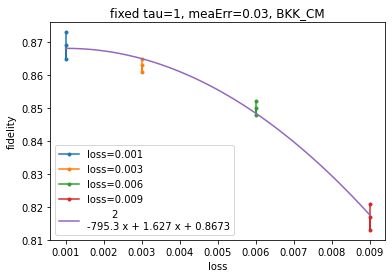

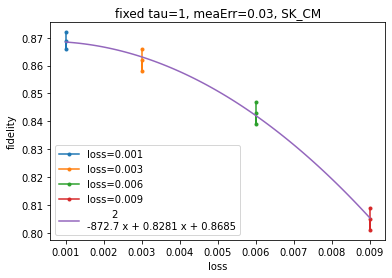

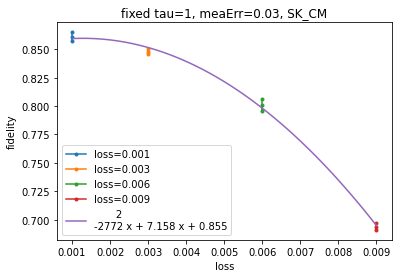

In [19]:
# loss-fidelity (fixed tau=1, meaErr=3%)
# BKK-CM
plt.plot([0.001]*3, [f_BKK_CM_1_tau1, f_BKK_CM_1_tau1-0.004, f_BKK_CM_1_tau1+0.004], '.-', label='loss=0.001') # loss = 0.001
plt.plot([0.003]*3, [f_BKK_CM_3_tau1, f_BKK_CM_3_tau1-0.002, f_BKK_CM_3_tau1+0.002], '.-', label='loss=0.003') # loss = 0.003
plt.plot([0.006]*3, [f_BKK_CM_6_tau1, f_BKK_CM_6_tau1-0.002, f_BKK_CM_6_tau1+0.002], '.-', label='loss=0.006') # loss = 0.006
plt.plot([0.009]*3, [f_BKK_CM_9_tau1, f_BKK_CM_9_tau1-0.004, f_BKK_CM_9_tau1+0.004], '.-', label='loss=0.009') # loss = 0.009

loss_fit = [0.001, 0.001, 0.001, 0.003, 0.003, 0.003, 0.006, 0.006, 0.006, 0.009, 0.009, 0.009]
model_loss = np.poly1d(np.polyfit(loss_fit, [
    f_BKK_CM_1_tau1, f_BKK_CM_1_tau1-0.004, f_BKK_CM_1_tau1+0.004, f_BKK_CM_3_tau1, f_BKK_CM_3_tau1-0.002, f_BKK_CM_3_tau1+0.002,
    f_BKK_CM_6_tau1, f_BKK_CM_6_tau1-0.002, f_BKK_CM_6_tau1+0.002, f_BKK_CM_9_tau1, f_BKK_CM_9_tau1-0.004, f_BKK_CM_9_tau1+0.004], 2))

x = np.linspace(0.001, 0.009, 100)
plt.plot(x, model_loss(x), label=model_loss)

plt.xlabel('loss')
plt.ylabel('fidelity')
plt.title('fixed tau=1, meaErr=0.03, BKK_CM')
plt.legend()
plt.show()

#---------------------------------------------------------------------------------------------------

# loss-fidelity (fixed tau=1, meaErr=3%)
# BKK-SK
plt.plot([0.001]*3, [f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], '.-', label='loss=0.001') # loss = 0.001
plt.plot([0.003]*3, [f_BKK_SK_3_tau1, f_BKK_SK_3_tau1-0.004, f_BKK_SK_3_tau1+0.004], '.-', label='loss=0.003') # loss = 0.003
plt.plot([0.006]*3, [f_BKK_SK_6_tau1, f_BKK_SK_6_tau1-0.004, f_BKK_SK_6_tau1+0.004], '.-', label='loss=0.006') # loss = 0.006
plt.plot([0.009]*3, [f_BKK_SK_9_tau1, f_BKK_SK_9_tau1-0.004, f_BKK_SK_9_tau1+0.004], '.-', label='loss=0.009') # loss = 0.009

loss_fit = [0.001, 0.001, 0.001, 0.003, 0.003, 0.003, 0.006, 0.006, 0.006, 0.009, 0.009, 0.009]
model_loss = np.poly1d(np.polyfit(loss_fit, [
    f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003, f_BKK_SK_3_tau1, f_BKK_SK_3_tau1-0.004, f_BKK_SK_3_tau1+0.004,
    f_BKK_SK_6_tau1, f_BKK_SK_6_tau1-0.004, f_BKK_SK_6_tau1+0.004, f_BKK_SK_9_tau1, f_BKK_SK_9_tau1-0.004, f_BKK_SK_9_tau1+0.004], 2))

x = np.linspace(0.001, 0.009, 100)
plt.plot(x, model_loss(x), label=model_loss)

plt.xlabel('loss')
plt.ylabel('fidelity')
plt.title('fixed tau=1, meaErr=0.03, SK_CM')
plt.legend()
plt.show()

#---------------------------------------------------------------------------------------------------

# loss-fidelity (fixed tau=1, meaErr=3%)
# SK-CM
plt.plot([0.001]*3, [f_SK_CM_1_tau1, f_SK_CM_1_tau1-0.004, f_SK_CM_1_tau1+0.004], '.-', label='loss=0.001') # loss = 0.001
plt.plot([0.003]*3, [f_SK_CM_3_tau1, f_SK_CM_3_tau1-0.002, f_SK_CM_3_tau1+0.002], '.-', label='loss=0.003') # loss = 0.003
plt.plot([0.006]*3, [f_SK_CM_6_tau1, f_SK_CM_6_tau1-0.005, f_SK_CM_6_tau1+0.005], '.-', label='loss=0.006') # loss = 0.006
plt.plot([0.009]*3, [f_SK_CM_9_tau1, f_SK_CM_9_tau1-0.003, f_SK_CM_9_tau1+0.003], '.-', label='loss=0.009') # loss = 0.009

loss_fit = [0.001, 0.001, 0.001, 0.003, 0.003, 0.003, 0.006, 0.006, 0.006, 0.009, 0.009, 0.009]
model_loss = np.poly1d(np.polyfit(loss_fit, [
    f_SK_CM_1_tau1, f_SK_CM_1_tau1-0.004, f_SK_CM_1_tau1+0.004, f_SK_CM_3_tau1, f_SK_CM_3_tau1-0.002, f_SK_CM_3_tau1+0.002,
    f_SK_CM_6_tau1, f_SK_CM_6_tau1-0.005, f_SK_CM_6_tau1+0.005, f_SK_CM_9_tau1, f_SK_CM_9_tau1-0.003, f_SK_CM_9_tau1+0.003], 2))

x = np.linspace(0.001, 0.009, 100)
plt.plot(x, model_loss(x), label=model_loss)

plt.xlabel('loss')
plt.ylabel('fidelity')
plt.title('fixed tau=1, meaErr=0.03, SK_CM')
plt.legend()
plt.show()

## tau - fidelity

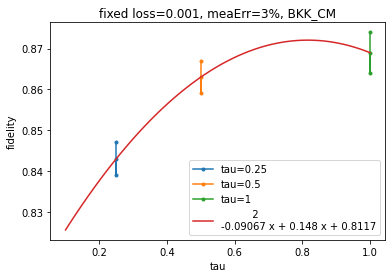

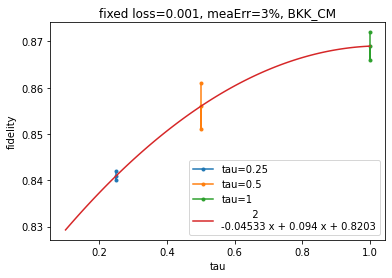

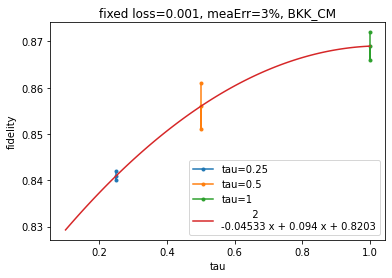

In [23]:
# tau-fidelity (fixed loss=0.001, meaErr=3%)
# BKK-CM
plt.plot([0.25]*3, [f_BKK_CM_1_tau25, f_BKK_CM_1_tau25-0.004, f_BKK_CM_1_tau25+0.004], '.-', label='tau=0.25') # tau = 0.25
plt.plot([0.5]*3, [f_BKK_CM_1_tau05, f_BKK_CM_1_tau05-0.004, f_BKK_CM_1_tau05+0.004], '.-', label='tau=0.5') # tau = 0.5
plt.plot([1]*3, [f_BKK_CM_1_tau1, f_BKK_CM_1_tau1-0.005, f_BKK_CM_1_tau1+0.005], '.-', label='tau=1') # tau = 1

tau_fit = [0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 1, 1]
model_tau = np.poly1d(np.polyfit(tau_fit, [
    f_BKK_CM_1_tau25, f_BKK_CM_1_tau25-0.004, f_BKK_CM_1_tau25+0.004, f_BKK_CM_1_tau05, f_BKK_CM_1_tau05-0.004, f_BKK_CM_1_tau05+0.004,
    f_BKK_CM_1_tau1, f_BKK_CM_1_tau1-0.005, f_BKK_CM_1_tau1+0.005], 2))
x = np.linspace(0.1, 1.0, 100)

plt.plot(x, model_tau(x), label=model_tau)

plt.xlabel('tau')
plt.ylabel('fidelity')
plt.title('fixed loss=0.001, meaErr=3%, BKK_CM')
plt.legend()
plt.show()

#---------------------------------------------------------------------------------------------------

# BKK-SK
plt.plot([0.25]*3, [f_BKK_SK_1_tau25, f_BKK_SK_1_tau25-0.001, f_BKK_SK_1_tau25+0.001], '.-', label='tau=0.25') # tau = 0.25
plt.plot([0.5]*3, [f_BKK_SK_1_tau05, f_BKK_SK_1_tau05-0.005, f_BKK_SK_1_tau05+0.005], '.-', label='tau=0.5') # tau = 0.5
plt.plot([1]*3, [f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], '.-', label='tau=1') # tau = 1

tau_fit = [0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 1, 1]
model_tau = np.poly1d(np.polyfit(tau_fit, [
    f_BKK_SK_1_tau25, f_BKK_SK_1_tau25-0.001, f_BKK_SK_1_tau25+0.001, f_BKK_SK_1_tau05, f_BKK_SK_1_tau05-0.005, f_BKK_SK_1_tau05+0.005,
    f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], 2))
x = np.linspace(0.1, 1.0, 100)

plt.plot(x, model_tau(x), label=model_tau)

plt.xlabel('tau')
plt.ylabel('fidelity')
plt.title('fixed loss=0.001, meaErr=3%, BKK_CM')
plt.legend()
plt.show()

#---------------------------------------------------------------------------------------------------

# BKK-SK
plt.plot([0.25]*3, [f_BKK_SK_1_tau25, f_BKK_SK_1_tau25-0.001, f_BKK_SK_1_tau25+0.001], '.-', label='tau=0.25') # tau = 0.25
plt.plot([0.5]*3, [f_BKK_SK_1_tau05, f_BKK_SK_1_tau05-0.005, f_BKK_SK_1_tau05+0.005], '.-', label='tau=0.5') # tau = 0.5
plt.plot([1]*3, [f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], '.-', label='tau=1') # tau = 1

tau_fit = [0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 1, 1]
model_tau = np.poly1d(np.polyfit(tau_fit, [
    f_BKK_SK_1_tau25, f_BKK_SK_1_tau25-0.001, f_BKK_SK_1_tau25+0.001, f_BKK_SK_1_tau05, f_BKK_SK_1_tau05-0.005, f_BKK_SK_1_tau05+0.005,
    f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], 2))
x = np.linspace(0.1, 1.0, 100)

plt.plot(x, model_tau(x), label=model_tau)

plt.xlabel('tau')
plt.ylabel('fidelity')
plt.title('fixed loss=0.001, meaErr=3%, BKK_CM')
plt.legend()
plt.show()

# Measurement error - fidelity

In [ ]:
# meaErr-fidelity (fixed loss=0.001, tau=1)
# BKK-CM
plt.plot([0.25]*3, [f_BKK_CM_1_tau25, f_BKK_CM_1_tau25-0.004, f_BKK_CM_1_tau25+0.004], '.-', label='tau=0.25') # tau = 0.25
plt.plot([0.5]*3, [f_BKK_CM_1_tau05, f_BKK_CM_1_tau05-0.004, f_BKK_CM_1_tau05+0.004], '.-', label='tau=0.5') # tau = 0.5
plt.plot([1]*3, [f_BKK_CM_1_tau1, f_BKK_CM_1_tau1-0.005, f_BKK_CM_1_tau1+0.005], '.-', label='tau=1') # tau = 1

meaErr_fit = [0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 1, 1]
model_meaErr = np.poly1d(np.polyfit(tau_fit, [
    f_BKK_CM_1_tau25, f_BKK_CM_1_tau25-0.004, f_BKK_CM_1_tau25+0.004, f_BKK_CM_1_tau05, f_BKK_CM_1_tau05-0.004, f_BKK_CM_1_tau05+0.004,
    f_BKK_CM_1_tau1, f_BKK_CM_1_tau1-0.005, f_BKK_CM_1_tau1+0.005], 2))
x = np.linspace(0.1, 1.0, 100)

plt.plot(x, y_tau, label=f'y = {model_tau[0]} x + {model_tau[1]}')

plt.xlabel('tau')
plt.ylabel('fidelity')
plt.title('fixed loss=0.001, meaErr=3%, BKK_CM')
plt.legend()
plt.show()

#---------------------------------------------------------------------------------------------------

# BKK-SK
plt.plot([0.25]*3, [f_BKK_SK_1_tau25, f_BKK_SK_1_tau25-0.001, f_BKK_SK_1_tau25+0.001], '.-', label='tau=0.25') # tau = 0.25
plt.plot([0.5]*3, [f_BKK_SK_1_tau05, f_BKK_SK_1_tau05-0.005, f_BKK_SK_1_tau05+0.005], '.-', label='tau=0.5') # tau = 0.5
plt.plot([1]*3, [f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], '.-', label='tau=1') # tau = 1

tau_fit = [0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 1, 1]
model_tau = np.polyfit(tau_fit, [
    f_BKK_SK_1_tau25, f_BKK_SK_1_tau25-0.001, f_BKK_SK_1_tau25+0.001, f_BKK_SK_1_tau05, f_BKK_SK_1_tau05-0.005, f_BKK_SK_1_tau05+0.005,
    f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], 1)
x = np.linspace(0.1, 1.0, 2)
model_tau[0] = round(model_tau[0], 2)
model_tau[1] = round(model_tau[1], 2)
y_tau = model_tau[0]*x + model_tau[1]
plt.plot(x, y_tau, label=f'y = {model_tau[0]} x + {model_tau[1]}')

plt.xlabel('tau')
plt.ylabel('fidelity')
plt.title('fixed loss=0.001, meaErr=3%, BKK_CM')
plt.legend()
plt.show()

#---------------------------------------------------------------------------------------------------

# BKK-SK
plt.plot([0.25]*3, [f_BKK_SK_1_tau25, f_BKK_SK_1_tau25-0.001, f_BKK_SK_1_tau25+0.001], '.-', label='tau=0.25') # tau = 0.25
plt.plot([0.5]*3, [f_BKK_SK_1_tau05, f_BKK_SK_1_tau05-0.005, f_BKK_SK_1_tau05+0.005], '.-', label='tau=0.5') # tau = 0.5
plt.plot([1]*3, [f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], '.-', label='tau=1') # tau = 1

tau_fit = [0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 1, 1, 1]
model_tau = np.polyfit(tau_fit, [
    f_BKK_SK_1_tau25, f_BKK_SK_1_tau25-0.001, f_BKK_SK_1_tau25+0.001, f_BKK_SK_1_tau05, f_BKK_SK_1_tau05-0.005, f_BKK_SK_1_tau05+0.005,
    f_BKK_SK_1_tau1, f_BKK_SK_1_tau1-0.003, f_BKK_SK_1_tau1+0.003], 1)
x = np.linspace(0.1, 1.0, 2)
model_tau[0] = round(model_tau[0], 2)
model_tau[1] = round(model_tau[1], 2)
y_tau = model_tau[0]*x + model_tau[1]
plt.plot(x, y_tau, label=f'y = {model_tau[0]} x + {model_tau[1]}')

plt.xlabel('tau')
plt.ylabel('fidelity')
plt.title('fixed loss=0.001, meaErr=3%, BKK_CM')
plt.legend()
plt.show()

# Heatmap for each parameters

In [15]:
f_BKK_CM_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.001_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.001 tau=1', plot=False)
f_BKK_CM_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.003_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.003 tau=1', plot=False)
f_BKK_CM_6_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.006_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.006 tau=1', plot=False)
f_BKK_CM_9_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_CM_0.009_tau1_meaErr1'), 1000, 9000, 'BKK_CM, loss=0.009 tau=1', plot=False)

print('-------------------------------------------------------------------------------------------')

f_BKK_SK_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.001_tau1_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.001 tau=1', plot=False)
f_BKK_SK_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.003_tau1_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.003 tau=1', plot=False)
f_BKK_SK_6_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.006_tau1_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.006 tau=1', plot=False)
f_BKK_SK_9_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/BKK_SK_0.009_tau1_meaErr1'), 1000, 9000, 'BKK_SK, loss=0.009 tau=1', plot=False)

print('-------------------------------------------------------------------------------------------')

f_SK_CM_1_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.001_tau1_meaErr1'), 1000, 9000, 'SK_CM, loss=0.001 tau=1', plot=False)
f_SK_CM_3_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.003_tau1_meaErr1'), 1000, 9000, 'SK_CM, loss=0.003 tau=1', plot=False)
f_SK_CM_6_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.006_tau1_meaErr1'), 1000, 9000, 'SK_CM, loss=0.006 tau=1', plot=False)
f_SK_CM_9_mea1_tau1 = plot_all(openPickle('meaErr_0.01/tau1/SK_CM_0.009_tau1_meaErr1'), 1000, 9000, 'SK_CM, loss=0.009 tau=1', plot=False)

9000 state tomography fidelity 0.927
9000 state tomography fidelity 0.92
9000 state tomography fidelity 0.904
9000 state tomography fidelity 0.871
-------------------------------------------------------------------------------------------
9000 state tomography fidelity 0.925
9000 state tomography fidelity 0.916
9000 state tomography fidelity 0.897
9000 state tomography fidelity 0.86
-------------------------------------------------------------------------------------------
9000 state tomography fidelity 0.921
9000 state tomography fidelity 0.906
9000 state tomography fidelity 0.856
9000 state tomography fidelity 0.737


Text(57.5, 0.5, 'Loss ( dB / km )')

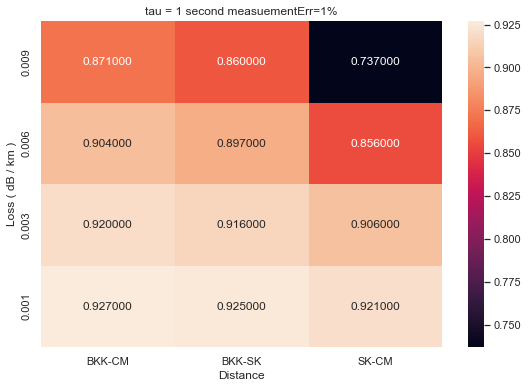

In [19]:
# meaErr = 1%, tau = 1
heatmap = np.array([ 
            [f_BKK_CM_9_mea1_tau1, f_BKK_SK_9_mea1_tau1, f_SK_CM_9_mea1_tau1], 
            [f_BKK_CM_6_mea1_tau1, f_BKK_SK_6_mea1_tau1, f_SK_CM_6_mea1_tau1],
            [f_BKK_CM_3_mea1_tau1, f_BKK_SK_3_mea1_tau1, f_SK_CM_3_mea1_tau1],
            [f_BKK_CM_1_mea1_tau1, f_BKK_SK_1_mea1_tau1, f_SK_CM_1_mea1_tau1],
            ])
loss = ["0.009", "0.006", "0.003", "0.001"]
place = ["BKK-CM", "BKK-SK", "SK-CM"]

seaborn.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax = seaborn.heatmap(heatmap, xticklabels=place, yticklabels=loss, fmt='f', annot=True)
plt.title('tau = 1 second measuementErr=1%')
plt.xlabel('Distance')
plt.ylabel('Loss ( dB / km )')

Text(57.5, 0.5, 'Loss ( dB / km )')

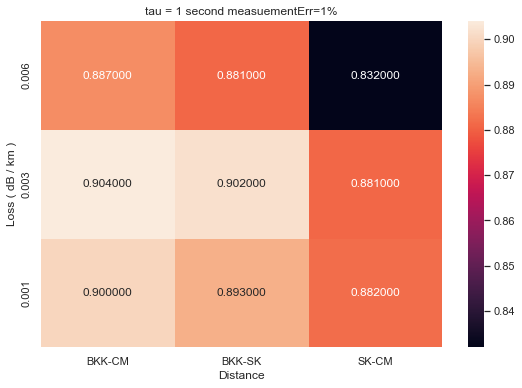

In [20]:
# meaErr = 1%, tau = 0.25
heatmap = np.array([
            [f_BKK_CM_6_mea1_tau25, f_BKK_SK_6_mea1_tau25, f_SK_CM_6_mea1_tau25],
            [f_BKK_CM_3_mea1_tau25, f_BKK_SK_3_mea1_tau25, f_SK_CM_3_mea1_tau25],
            [f_BKK_CM_1_mea1_tau25, f_BKK_SK_1_mea1_tau25, f_SK_CM_1_mea1_tau25],
            ])
loss = ["0.006", "0.003", "0.001"]
place = ["BKK-CM", "BKK-SK", "SK-CM"]

seaborn.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax = seaborn.heatmap(heatmap, xticklabels=place, yticklabels=loss, fmt='f', annot=True)
plt.title('tau = 1 second measuementErr=1%')
plt.xlabel('Distance')
plt.ylabel('Loss ( dB / km )')

Text(57.5, 0.5, 'Loss ( dB / km )')

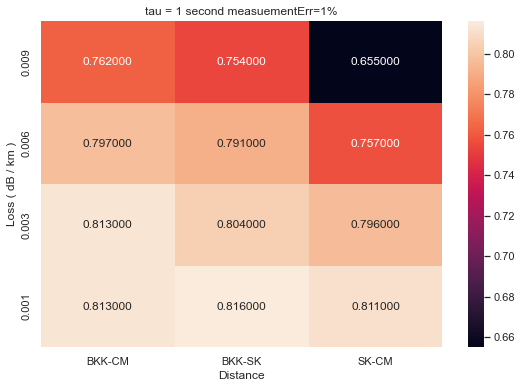

In [13]:
# meaErr = 5% , tau = 1
heatmap = np.array([ 
            [f_BKK_CM_9_mea5_tau_1, f_BKK_SK_9_mea5_tau_1, f_SK_CM_9_mea5_tau_1], 
            [f_BKK_CM_6_mea5_tau_1, f_BKK_SK_6_mea5_tau_1, f_SK_CM_6_mea5_tau_1],
            [f_BKK_CM_3_mea5_tau_1, f_BKK_SK_3_mea5_tau_1, f_SK_CM_3_mea5_tau_1],
            [f_BKK_CM_1_mea5_tau_1, f_BKK_SK_1_mea5_tau_1, f_SK_CM_1_mea5_tau_1],
            ])

loss = ["0.009", "0.006", "0.003", "0.001"]
place = ["BKK-CM", "BKK-SK", "SK-CM"]

seaborn.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax = seaborn.heatmap(heatmap, xticklabels=place, yticklabels=loss, fmt='f', annot=True)
plt.title('tau = 1 , meaErr = 0.05')
plt.xlabel('Distance')
plt.ylabel('Loss ( dB / km )')

Text(57.5, 0.5, 'Loss ( dB / km )')

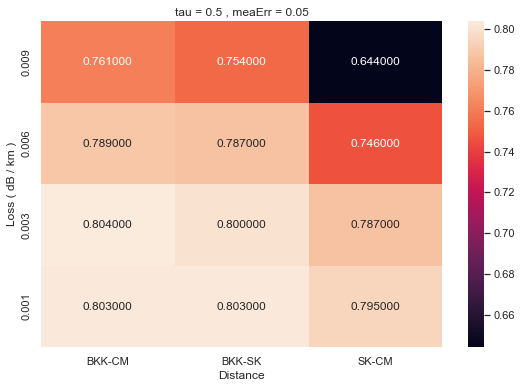

In [16]:
# meaErr = 5% , tau = 0.5
heatmap = np.array([ 
            [f_BKK_CM_9_mea5_tau_05, f_BKK_SK_9_mea5_tau_05, f_SK_CM_9_mea5_tau_05], 
            [f_BKK_CM_6_mea5_tau_05, f_BKK_SK_6_mea5_tau_05, f_SK_CM_6_mea5_tau_05],
            [f_BKK_CM_3_mea5_tau_05, f_BKK_SK_3_mea5_tau_05, f_SK_CM_3_mea5_tau_05],
            [f_BKK_CM_1_mea5_tau_05, f_BKK_SK_1_mea5_tau_05, f_SK_CM_1_mea5_tau_05],
            ])

loss = ["0.009", "0.006", "0.003", "0.001"]
place = ["BKK-CM", "BKK-SK", "SK-CM"]

seaborn.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax = seaborn.heatmap(heatmap, xticklabels=place, yticklabels=loss, fmt='f', annot=True)
plt.title('tau = 0.5 , meaErr = 0.05')
plt.xlabel('Distance')
plt.ylabel('Loss ( dB / km )')

Text(57.5, 0.5, 'Loss ( dB / km )')

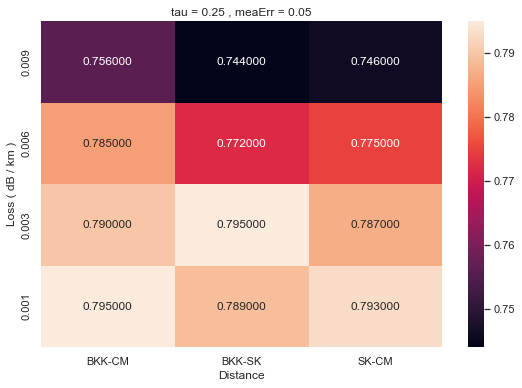

In [17]:
# meaErr = 5% , tau = 0.25
heatmap = np.array([ 
            [f_BKK_CM_9_mea5_tau_25, f_BKK_SK_9_mea5_tau_25, f_SK_CM_9_mea5_tau_25], 
            [f_BKK_CM_6_mea5_tau_25, f_BKK_SK_6_mea5_tau_25, f_SK_CM_6_mea5_tau_25],
            [f_BKK_CM_3_mea5_tau_25, f_BKK_SK_3_mea5_tau_25, f_SK_CM_3_mea5_tau_25],
            [f_BKK_CM_1_mea5_tau_25, f_BKK_SK_1_mea5_tau_25, f_SK_CM_1_mea5_tau_25],
            ])

loss = ["0.009", "0.006", "0.003", "0.001"]
place = ["BKK-CM", "BKK-SK", "SK-CM"]

seaborn.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
ax = seaborn.heatmap(heatmap, xticklabels=place, yticklabels=loss, fmt='f', annot=True)
plt.title('tau = 0.25 , meaErr = 0.05')
plt.xlabel('Distance')
plt.ylabel('Loss ( dB / km )')